In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('fashion-mnist_train.csv')

In [41]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [0]:
X = df.drop('label', axis=1).to_numpy()

In [0]:
y = df['label'].to_numpy()

In [0]:
X = X.reshape(-1, 28, 28)

(<matplotlib.image.AxesImage at 0x7f870c19dbe0>, 2)

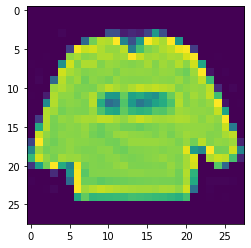

In [45]:
plt.imshow(X[0]), y[0]

In [0]:
X = X/255

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y = to_categorical(y)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(64, activation='softmax'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        73792     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [0]:
cp = ModelCheckpoint('best.h5', save_best_only=True)
es = EarlyStopping(patience=5, restore_best_weights=True)

In [0]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [35]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, callbacks=[cp, es])

Epoch 1/200
1500/1500 [==============================] - 16s 11ms/step - loss: 1.5460 - accuracy: 0.5365 - val_loss: 1.1312 - val_accuracy: 0.5742
Epoch 2/200
1500/1500 [==============================] - 16s 11ms/step - loss: 0.9843 - accuracy: 0.5910 - val_loss: 0.9154 - val_accuracy: 0.5979
Epoch 3/200
1500/1500 [==============================] - 16s 11ms/step - loss: 0.8406 - accuracy: 0.6173 - val_loss: 0.8162 - val_accuracy: 0.6182
Epoch 4/200
1500/1500 [==============================] - 16s 11ms/step - loss: 0.7478 - accuracy: 0.6993 - val_loss: 0.7261 - val_accuracy: 0.7119
Epoch 5/200
1500/1500 [==============================] - 16s 11ms/step - loss: 0.6541 - accuracy: 0.7715 - val_loss: 0.6131 - val_accuracy: 0.8210
Epoch 6/200
1500/1500 [==============================] - 16s 11ms/step - loss: 0.5129 - accuracy: 0.8495 - val_loss: 0.5010 - val_accuracy: 0.8397
Epoch 7/200
1500/1500 [==============================] - 16s 11ms/step - loss: 0.4279 - accuracy: 0.8763 - val_loss: 0

In [36]:
model.evaluate(X_test, y_test)

375/375 [==============================] - 2s 5ms/step - loss: 0.3248 - accuracy: 0.8973


[0.3247916102409363, 0.8973333239555359]

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(64, activation='softmax'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
X = X.reshape(-1, 28, 28, 1)

In [52]:
model.fit(X, y, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 18s 10ms/step - loss: 1.4287 - accuracy: 0.5584
Epoch 2/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.9054 - accuracy: 0.6026
Epoch 3/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.7777 - accuracy: 0.6743
Epoch 4/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.6346 - accuracy: 0.7971
Epoch 5/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5395 - accuracy: 0.8249
Epoch 6/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4815 - accuracy: 0.8433
Epoch 7/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4360 - accuracy: 0.8628
Epoch 8/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3786 - accuracy: 0.8862
Epoch 9/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3217 - accuracy: 0.9016
Epoch 10/20
1875/1875 [==============================] - 18s 10m

In [0]:
model.save('model_best.h5')

In [0]:
df_test = pd.read_csv('Q2_Clothing_test.csv')

In [55]:
df_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,22,105,96,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,15,172,92,0,0,0,0,0,125,165,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,244,247,241,...,255,255,235,201,82,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,61,2,0,14,67,54,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,4,129,95,125,139,47,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,143,...,62,79,156,165,12,0,2,0,0,0,0,0,0,0,0,0,1,1,0,2,82,78,83,87,83,82,79,79,79,93,155,163,19,0,2,0,0,0,0,0


In [0]:
test_X = df_test.to_numpy().reshape(-1, 28, 28, 1)

In [57]:
preds = model.predict_classes(test_X)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [0]:
final = pd.DataFrame(preds, columns=['Predictions'])

In [0]:
final.to_csv('submit.csv', index=False)